# Mandelbrot - Mini Project 3

`mandulakenyer.py` contains implementations from previous tasks with Docstrings.
`mandelbrot_test.py` is the unitest file. \
`mandelbrot_cl.py` contains the OpenCL implementation, `kernel.cl` is the kernel for OpenCL.

### Import modules and packages

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pyopencl as cl
import time
import pandas as pd
import seaborn as sns

import mandulakenyer as mk # Mandelbrot implementations from previous tasks
import mandelbrot_cl as mcl # OpenCL implementation of Mandelbrot

### Parameters

In [2]:
RE_MIN = -2
RE_MAX = 1
RE_SCALE = 1000

IM_MIN = -1.5
IM_MAX = 1.5
IM_SCALE = 1000

T = 2 # threshold
I = 100 # iteration

re = np.linspace(RE_MIN, RE_MAX, RE_SCALE, dtype=np.float32)
im = np.linspace(IM_MIN, IM_MAX, IM_SCALE, dtype=np.float32)

In [3]:
size_params = [RE_MIN, RE_MAX, IM_MIN, IM_MAX]

In [4]:
# for visulalizing the results of algorithms
def plotting(res, size_params):
    plt.figure(figsize=(8,8))
    # plt.title(title)
    plt.imshow(res, cmap='inferno', extent=[size_params[0], size_params[1], size_params[2], size_params[3]])

### Unittest

In [10]:
! python mandelbrot_test.py

...c:\Users\Kata\Documents\uni\CE8\NSC\code\ce8-nsc\mini project 3\mandulakenyer.py:94: RuntimeWarning: overflow encountered in square
  z = z**2 + c
c:\Users\Kata\Documents\uni\CE8\NSC\code\ce8-nsc\mini project 3\mandulakenyer.py:94: RuntimeWarning: invalid value encountered in square
  z = z**2 + c
c:\Users\Kata\Documents\uni\CE8\NSC\code\ce8-nsc\mini project 3\mandulakenyer.py:95: RuntimeWarning: overflow encountered in absolute
  M[thresh <= abs(z)] = i
...
----------------------------------------------------------------------
Ran 6 tests in 12.936s

OK


### CL implementation

Test CL implementation

In [ ]:
M = mcl.mandelbrot_cl(re, im, I, T)

In [ ]:
plotting(M, size_params)

működik a gecci

#### Different grid sizes

In [28]:
GRID_SIZE = [100, 200, 500, 1000, 2000, 5000, 10000]
grid_time = {}

for grid in GRID_SIZE:
    re = np.linspace(RE_MIN, RE_MAX, grid, dtype=np.float32)
    im = np.linspace(IM_MIN, IM_MAX, grid, dtype=np.float32)

    t0 = time.time()
    M = mcl.mandelbrot_cl(re, im, I, T)
    t1 = time.time() - t0

    grid_time[grid] = t1

df_grid = pd.DataFrame(grid_time.items(), columns=['grid_size', 'time'])

Text(0, 0.5, 'time [s]')

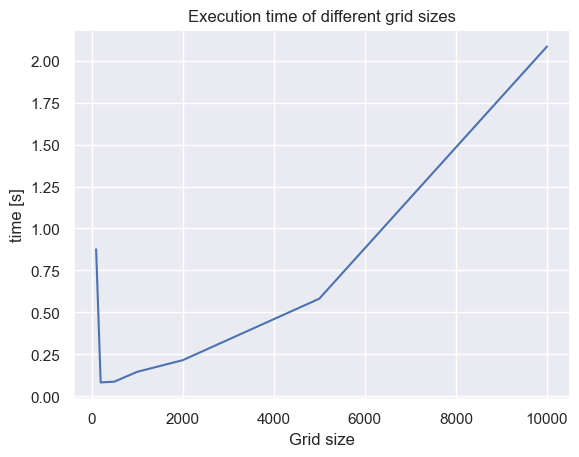

In [29]:
# visualize
sns.set_theme()
sns.lineplot(df_grid, x='grid_size', y='time')
plt.title("Execution time of different grid sizes")
plt.xlabel("Grid size")
plt.ylabel("time [s]")

First, increasing the grid size reduces the execution time, but after a while the execution time will increase drastically.

#### CPU vs. GPU

In [13]:
pu = {}

for platform in cl.get_platforms():

    for device in platform.get_devices():
        t0 = time.time()
        M = mcl.mandelbrot_cl(re, im, I, T, device)
        t1 = time.time() - t0
        
        pu[device.name] = t1

df_pu = pd.DataFrame(pu.items(), columns=['device_name', 'time'])

Text(0, 0.5, 'time [s]')

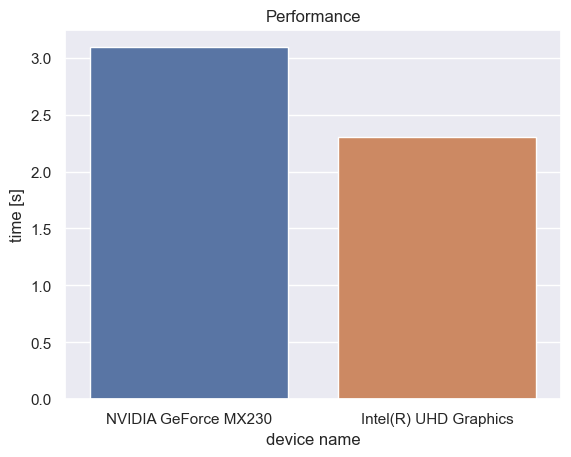

In [26]:
# visualizing 
sns.barplot(df_pu, x='device_name', y='time')
plt.title('Performance of GPUs')
plt.xlabel('device name')
plt.ylabel('time [s]')

The Inter(R) UHD Graphics perfomrs better than the NVIDIA GeForce MX230  - which is kinda sad, my GPU is useless :((